Профессия Data Science:  
Блок 1. Знакомство с данными. Python для анализа данных
#### ***PYTHON-13. Визуализация данных***

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px


# Загружаем исходные данные:
churn_data = pd.read_csv('data/churn.csv')
# Удаляем столбец "RowNumber" — номер строки таблицы:
churn_data.drop('RowNumber', axis = 1, inplace = True)

# # Преобразуем статус активности:
# churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
# # Преобразуем статус - Ушедший или Лояльный клиент:
# churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

# Выводим на экран данные:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### ЗАДАНИЯ:

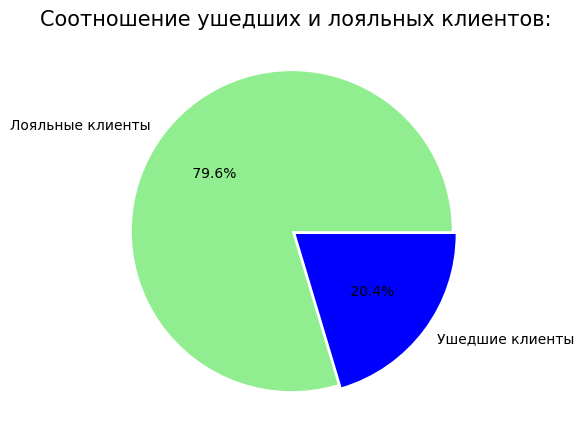

In [3]:
# 9.1. Каково соотношение ушедших и лояльных клиентов?
# Покажите это на графике и дайте комментарий по соотношению.

# Построим круговую диаграмму:
fig = plt.figure(figsize=(4, 4))
# Координатная плоскость и графические объекты расположенные на ней:
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(churn_data['Exited'].value_counts(),
    # Метки, соответствующие значениям:
    labels=('Лояльные клиенты', 'Ушедшие клиенты'),
    # Формат отображения долей на диаграмме:
    autopct = ' %.1f%% ',
    # Цвет графика:
    colors = ['lightgreen', 'blue'], 
    # Доля смещения сектора от центра для каждого значения из x:
    explode = [0.03, 0])
# Заголовок графика:
title = ax.set_title('Соотношение ушедших и лояльных клиентов:', fontsize=15)
# Выводим результат на экран:
plt.show() 

ВЫВОД: на представленном графике наглядно видно, что доля лояльных клиентов в 4 раза превышает долю ушедших клиентов и составляет - 79,6%.

In [4]:
# 9.2. Постройте график, показывающий распределение баланса пользователей,
# у которых на счету больше 2500 долларов. Опишите распределение и сделайте выводы.

# Построим гистограмму распределения с помощью библиотеки Plotly:
fig = px.histogram(churn_data[churn_data.Balance > 2500],
    # Признак, который будет отложен по оси абсцисс:                   
    x='Balance', 
    # Число столбцов (корзин) в гистограмме:                  
    nbins=40,
    # Заголовок графика:
    title="""Распределение баланса клиентов,
    у которых на счету больше 2500 долларов:""",
    # Цвет графика:              
    color_discrete_sequence = ['lightgreen'])
# Присваиваем заголовки осей координат:
fig.update_xaxes(title_text='Баланс')
fig.update_yaxes(title_text='Количество клиентов')
# Выводим результат на экран:
fig.show()

ВЫВОД: на представленном графике наглядно видно, что у основной части пользователей, на счетах которых больше 2500 долларов баланс находится в диапазоне от 100 000 до 150 000. Распределение похоже на нормальное.    

In [5]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

# Построим гистограмму распределения с помощью библиотеки Plotly:
fig = px.histogram(churn_data,
    # Признак, который будет отложен по оси абсцисс:                  
    x = 'Balance',
    # Число столбцов (корзин) в гистограмме: 
    nbins = 40,
    # Заголовок графика:
    title = 'Распределение баланса клиентов по оттоку:',
    # От чего зависит цвет графика:
    # Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
    color = "Exited",
    # Цвет графика:
    color_discrete_sequence = ['lightgreen', 'blue'])
# Присваиваем заголовки осей координат:
fig.update_xaxes(title_text = 'Баланс')
fig.update_yaxes(title_text = 'Количество клиентов')
# Выводим результат на экран:
fig.show()   

ВЫВОД: на представленном графике наглядно видно, что ушедших клиентов меньше, чем лояльных. Есть большое количество лояльных клиентов с нулевым балансом, у ушедших клиентов нулевых балансов значительно меньше.

Главные причины оттока клиентов банка:  
1. Высокие комиссии и скрытые платежи.
2. Низкое качество обслуживания.
3. Отсутствие удобных онлайн-сервисов.
4. Недостаточная информация о предоставляемых услугах.
5. Неудовлетворительная работа с кредитами и депозитами. 

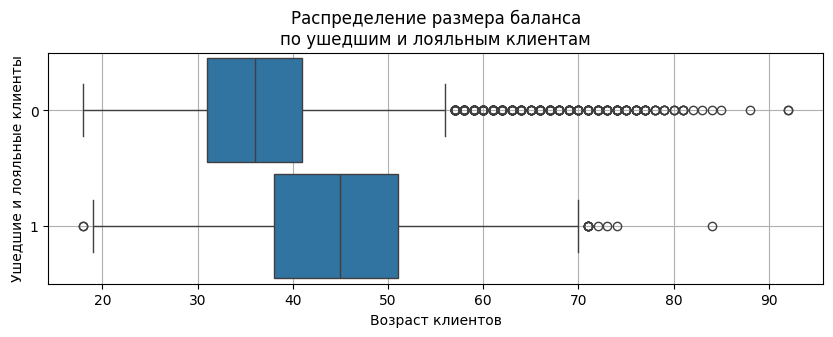

In [6]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов
# стоит обратить внимание банку?

# Построим коробчатую диаграмму:
fig = plt.figure(figsize = (10, 3))
boxplot = sns.boxplot(
    data = churn_data,
    # Признак, который будет отложен по оси ординат:
    # Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
    y = 'Exited',
    # Признак, который будет отложен по оси абсцисс:
    # Возраст клиентов
    x = 'Age',
    # Горизонтальная ориентация диаграммы:
    orient = 'h',
    # Ширина коробок:
    width = 0.9)
# Заголовок графика:
boxplot.set_title("""Распределение размера баланса
по ушедшим и лояльным клиентам""");
# Присваиваем заголовки осей координат:
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Ушедшие и лояльные клиенты');
# Выводим результат на экран:
boxplot.grid()

ВЫВОД: на представленном графике наглядно видно, что банку следует уделить внимание на возрастную группу от 40 до 50 лет, в которой находиться наибольшее количество клиентов ушедших из банка.

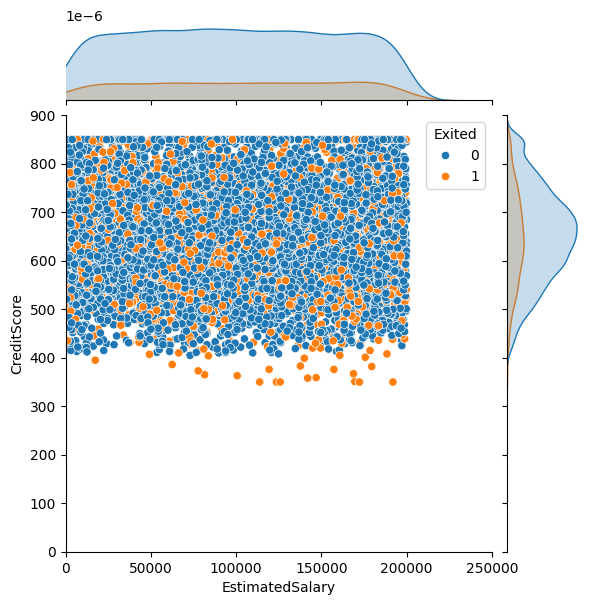

In [7]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

# Построим график зависимости кредитного рейтинга клиента (CreditScore) от
# предполагаемой заработной платы клиента(EstimatedSalary).

jointplot = sns.jointplot(
    data = churn_data,
    # Предполагаемая заработная плата клиента: 
    x = 'EstimatedSalary',
    # Кредитный рейтинг клиента (чем он выше, тем больше клиент
    # брал кредитов и возвращал их):
    y = 'CreditScore',
    # От чего зависит цвет графика:
    # Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент):
    hue = 'Exited',
    # Диапазон отображения оси x:
    xlim = (0, 250000),
    # Диапазон отображения оси y: 
    ylim = (0, 900),
    # Высота и ширина графика: 
    height = 6,)
# Выводим результат на экран:
plt.show()

ВЫВОД: на представленном графике наглядно видно, что ушедшие клиенты и лояльные клиенты имеют примерно одинаковый кредитный рейтинг и предполагаемую зарплату, и только у ушедших клиентов рейтинг меньше 400.

In [8]:
# 9.6. Кто чаще уходит, мужчины или женщины?
# Постройте график, который иллюстрирует это.

# Подсказка: 
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее
# по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные,
# среднее арифметическое по столбцу обозначает долю ушедших клиентов).

# Прогруппируем статус лояльности по признаку пола и найдем среднее:
ex_gen_data = churn_data.groupby(['Gender'])['Exited'].mean()

# Построим столбчатую диаграмму
ex_gen_fig = px.bar(
    data_frame=ex_gen_data,
    x=ex_gen_data.index,
    # От чего зависит цвет графика:
    # Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент): 
    y='Exited',
    # Заголовок графика:
    title='Соотношение ушедших мужчин и женщин:')
# Выводим результат на экран:
ex_gen_fig.show()

ВЫВОД: на представленном графике наглядно видно, что женщины чаще (примерно на 60%) уходят из банка чем мужчины.

In [9]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# Создаем сводную таблицу:
df_services = churn_data.pivot_table(index = 'NumOfProducts',
    columns = 'Exited',
    values = 'CustomerId',
    aggfunc = 'count',
    fill_value = 0)

# Построим многоуровневую столбчатую диаграмму:
fig = px.bar(df_services,
    barmode = 'group',
    # Заголовок графика:
    title = 'Зависимость оттока клиентов от числа приобретенных услуг:',
    # Цвет графика:
    color_discrete_sequence = ['lightgreen', 'blue'],
    # Высота графика:
    height = 600)
# Присваиваем заголовки осей координат:
fig.update_xaxes(title_text = 'Количество приобретенных услуг')
fig.update_yaxes(title_text = 'Количество клиентов')
# Выводим результат на экран:
fig.show()

ВЫВОД: на представленном графике наглядно видно, что большой отток наблюдается у клиентов, пользующихся 3-4 продуктами компании. Возможно это  можно объяснить, например, у клиента есть несколько кредитов из банка,кредитная карточка и он, выплатив кредиты, больше не нуждается в услугах банка и поэтому уходит.

In [10]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов?
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку,
# чтобы уменьшить отток клиентов среди неактивных?

# Создаем сводную таблицу:
df_services = churn_data.pivot_table(index = 'IsActiveMember',
    columns = 'Exited',
    values = 'CustomerId',
    aggfunc = 'count',
    fill_value = 0)

# Построим многоуровневую столбчатую диаграмму:
fig = px.bar(df_services,
    barmode = 'group',
    # Заголовок графика:
    title = 'Влияние статуса активного клиента на отток клиентов:',
    # Цвет графика:
    color_discrete_sequence = ['lightgreen', 'blue'],
    # Высота графика:
    height = 500)
# Присваиваем заголовки осей координат:
fig.update_xaxes(title_text = 'Наличие у клиента статуса \
активного клиента банка (0 — нет, 1 — да)')
fig.update_yaxes(title_text = 'Количество клиентов')
# Выводим результат на экран:
fig.show()

ВЫВОД: на представленном графике наглядно видно, что среди активных клиентов больше лояльных и меньше клиентов покинувших банк. Для повышения активности клиентов банку необходимо проводить различные маркетинговые мероприятия: предоставлять больше выгодных предложений, акций, улучшение условий кредитования, повышение процентов по вкладам и другие.

In [11]:
# 9.9. В какой стране доля ушедших клиентов больше?
# Постройте тепловую картограмму, которая покажет это
# соотношение на карте мира.
# Предположите, с чем это может быть связано.

choropleth_data = churn_data.groupby(['Geography'])['Exited'].mean()

# Построим тепловую картограмму, которая покажет
# соотношение ушедших клиентов на карте мира:
fig = px.choropleth(
    data_frame = choropleth_data,
    # Столбец с локациями:
    locations = choropleth_data.index,
    # Режим сопоставления локаций с базой Plotly:
    locationmode = "country names",
    # От чего зависит цвет графика:
    # Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент):
    color = "Exited",
    # Диапазон цвета:
    range_color = [0, 0.35],
    # Заголовок графика:
    title = 'Зависимость оттока клиентов от географического расположения:',
    # Ширина графика:
    width = 800,
    # Высота графика:
    height = 500,
    # Палитра цветов:
    color_continuous_scale = 'Reds')
# Выводим результат на экран:
fig.show()

ВЫВОД: на представленном графике наглядно видно, что самый высокий отток клиентов наблюдается в Германии, далее в Испании и Франции. Возможно основными причинами оттока могут быть сложившиеся политическая и экономическая обстановка в стране.

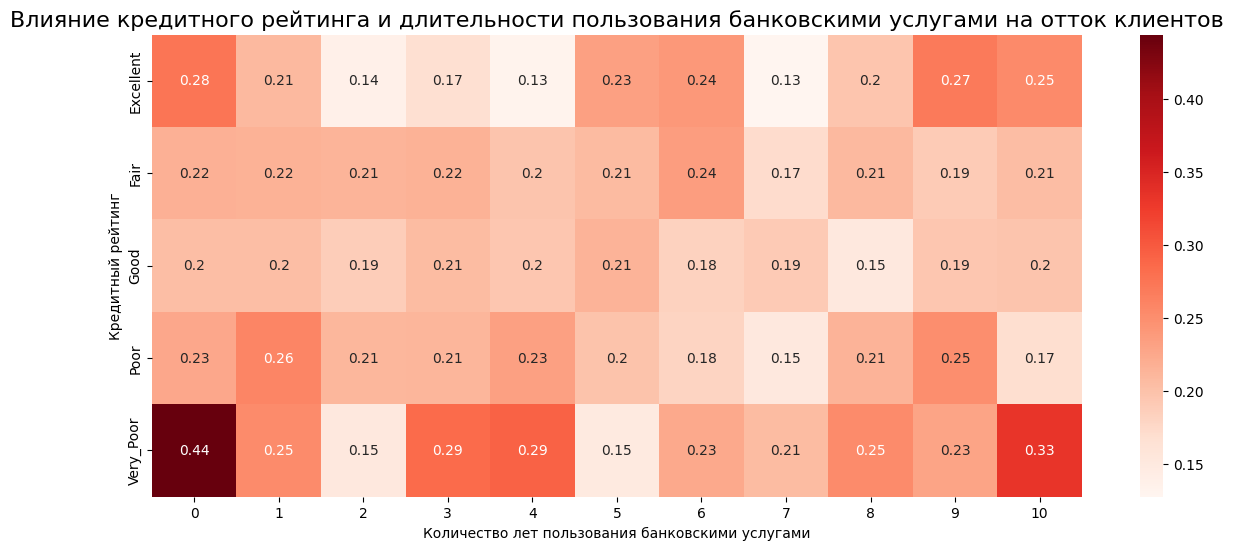

In [12]:
# 9.10. Переведите числовой признак CreditScore в категориальный.
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая
# приведена ниже. Примените её к столбцу CreditScore и создайте новый
# признак CreditScoreCat — категории кредитного рейтинга.


def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Постройте сводную таблицу, строками которой являются категории
# кредитного рейтинга (CreditScoreCat), а столбцами — количество лет,
# в течение которых клиент пользуется услугами банка (Tenure). В ячейках
# сводной таблицы должно находиться среднее по признаку
# оттока (Exited) — доля ушедших пользователей. 
# На основе полученной сводной таблицы постройте тепловую карту с
# аннотацией. Найдите на тепловой карте категории клиентов, которые
# уходят чаще всего.

# Построим сводную таблицу:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')

pivot = churn_data.pivot_table(values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
    aggfunc = 'mean')

# На основе полученной сводной таблицы построим
# тепловую карту с аннотацией:
fig = plt.figure(figsize = (15, 6))
heatmap = sns.heatmap(data = pivot, annot = True, cmap = 'Reds')
# Заголовок графика:
heatmap.set_title('Влияние кредитного рейтинга и длительности \
пользования банковскими услугами на отток клиентов', fontsize=16)
# Присваиваем заголовки осей координат:
heatmap.set(xlabel = 'Количество лет пользования банковскими услугами',
    ylabel = 'Кредитный рейтинг')
# Выводим результат на экран:
plt.show()

ВЫВОД: на представленном графике наглядно видно, что чаще всего банк покидают клиенты категории Very_Poor, которые пользуются банковскими услугами меньше одного года.   

ИТОГОВЫЕ ВЫВОДЫ:
Основными причинами оттока являются: возраст и активность взаимодействия клиента с банком, количество банковских продуктов, которыми владеет клиент.

Для уменьшения оттока банковских клиентов в Германии, необходимо осуществить маркетинговые мероприятия: привлечение более молодых клиентов, увеличение активности банковских клиентов, предоставлять скидки и бонусы для клиентов, пользующихся одной услугой компании, на покупку второй услуги.